# Experiment description:

- Implement clustering analysis using data about students performance in virtual classes

### Imports needed modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn import metrics
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.cluster import Birch
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MiniBatchKMeans
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
import seaborn
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.io import arff
from sklearn.model_selection import train_test_split
from yellowbrick.cluster import KElbowVisualizer


Load dataset

In [2]:
data = pd.read_excel('../data/processed/dataset_clean.xlsx')

In [3]:
columns = list(data.columns.values)

In [4]:
X = np.array(data.drop(columns[len(columns)-1], axis=1))
y = np.array(data[columns[len(columns)-1]])


In [5]:

iterations = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in iterations]
print("Kmeans")
print(kmeans)
score = [kmeans[i].fit(X).score(X)*-1 for i in range(len(kmeans))]
print (" El puntaje")
print (score)

Kmeans
[KMeans(n_clusters=1), KMeans(n_clusters=2), KMeans(n_clusters=3), KMeans(n_clusters=4), KMeans(n_clusters=5), KMeans(n_clusters=6), KMeans(n_clusters=7), KMeans(), KMeans(n_clusters=9), KMeans(n_clusters=10), KMeans(n_clusters=11), KMeans(n_clusters=12), KMeans(n_clusters=13), KMeans(n_clusters=14), KMeans(n_clusters=15), KMeans(n_clusters=16), KMeans(n_clusters=17), KMeans(n_clusters=18), KMeans(n_clusters=19)]
 El puntaje
[16941493.061146338, 3225655.848330915, 1630916.6004235111, 1161873.5969645558, 907047.8039196876, 802300.5835944441, 723058.6790574421, 657143.499161474, 607836.6265247613, 538032.8386757534, 499953.5273791989, 460559.32780398923, 439093.64111135417, 415122.6183334995, 399959.4742234748, 380235.61995292536, 376324.15830484475, 353265.5882103418, 340278.15134504467]


With elbow technique

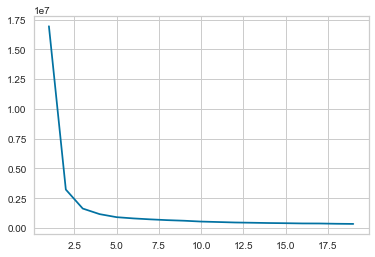

In [6]:
plt.plot(iterations, score)

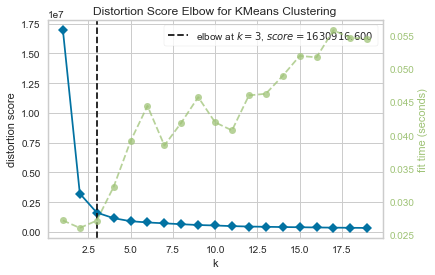

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 20))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

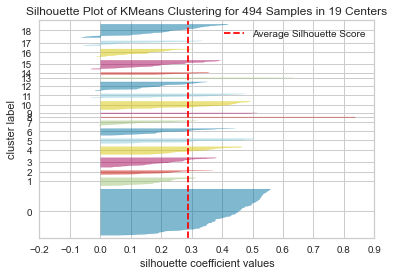

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 494 Samples in 19 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [8]:
from yellowbrick.cluster import SilhouetteVisualizer
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)
visualizer.show()

In [15]:
#Reset the style URGENT use it at your won risk
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

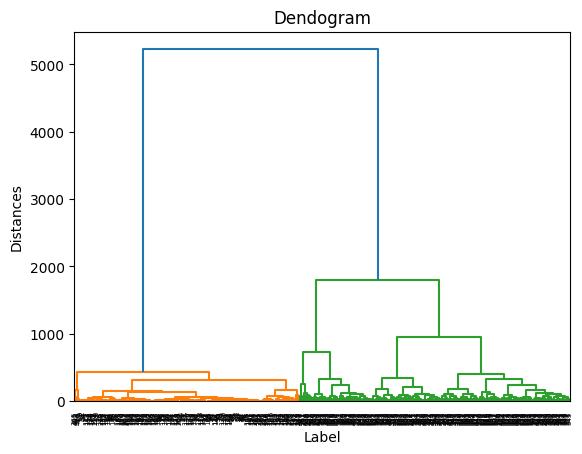

In [16]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

plt.title('Dendogram')
plt.xlabel('Label')
plt.ylabel('Distances')
plt.show()

Conclusions

Taking into account the different techniques used here, we can see that the algorithms (k-means) and also the elbow technique and the dendogram, shows around 3 clusters or categories, which is close to what we have in the label (only two categories) however it is not quite correct since the business understanding told us a person can either win or not the course, so what would it be the 3rd category detected by the clustering analysis?

In [11]:
from sklearn.decomposition import PCA

In [12]:
k = 3
model_k_3 = KMeans(n_clusters=k).fit(X)


cluster_centers = model_k_3.cluster_centers_
clusters = KMeans(n_clusters=k, random_state=12345).fit_predict(X)
len(clusters)
pca = PCA(n_components=2, random_state=0)
reduced_features = pca.fit_transform(X)
    # reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(model_k_3.cluster_centers_)

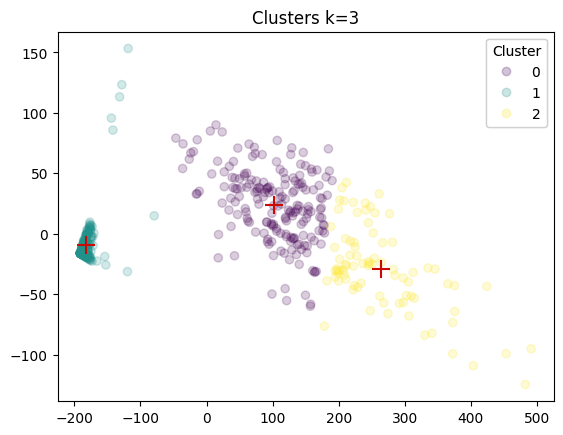

<Figure size 1500x1500 with 0 Axes>

In [17]:
# reduce the cluster centers to 2D

fig, ax = plt.subplots()
# Data as it is <3 
scatter = plt.scatter(reduced_features[:,0], reduced_features[:,1], c = clusters, alpha=0.2)
# Clusters
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='+', s=150, c='r')
legend1 = ax.legend(*scatter.legend_elements(),loc="best", title="Cluster")
plt.title(f'Clusters k={k}')
ax.add_artist(legend1)
plt.figure(figsize=(15, 15))
plt.show()

Based on the closest element of each centroid, we can say that the centroid 0, is defined as the students that failed based on the variables. For the cluster 1 and 2, the numbers increase, showing a possible example of the students that win the virtual class, and the students that not only win the virtual class but have a great performance aroud the course. 

In [38]:
closest, t = pairwise_distances_argmin_min(cluster_centers, X)
count = 0
for row in closest:

    print(f"----------Cluster {count}----------")
    print(f' Row: {X[row]}, \n Label: {y[row]}')
    count += 1

----------Cluster 0----------
 Row: [ 2.75        3.          2.5         2.33333333  1.25        2.34722222
  0.          2.          0.          0.          1.39051095  5.
  6.          0.          0.          0.          1.          1.
  5.         29.          0.          0.          1.          0.
  4.          5.          6.         13.71428519  0.        ], 
 Label: NO
----------Cluster 1----------
 Row: [3.00000000e+00 3.00000000e+00 2.33333333e+00 3.00000000e+00
 2.75000000e+00 2.84722222e+00 1.80000000e+01 1.20000000e+02
 1.20000000e+01 6.00000000e+00 1.81818182e-01 4.00000000e+00
 4.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
 1.00000000e+00 1.00000000e+00 2.00000000e+00 3.80000000e+01
 0.00000000e+00 0.00000000e+00 1.00000000e+00 1.00000000e+00
 1.90000000e+01 2.67000000e+02 3.50000000e+01 9.39428568e+01
 2.00000000e+00], 
 Label: SI
----------Cluster 2----------
 Row: [2.50000000e+00 2.33333333e+00 2.50000000e+00 2.33333333e+00
 1.50000000e+00 2.31944444e+00 

Clustering 0 corresponds to 
Clustering 1 correpsonds to 
Clustering 2 corresponds to

In [41]:
agglomerative = AgglomerativeClustering(n_clusters = k).fit(X)
labels = model_k_3.predict(X)

print("Silhouette: ", metrics.silhouette_score(X, agglomerative.labels_),
          "\nHomogeneity_score: ",metrics.homogeneity_score(labels, agglomerative.labels_),
            "\nCompleteness_score: ", metrics.completeness_score(labels, agglomerative.labels_),
            "\nv_measure_score: ", metrics.v_measure_score(labels, agglomerative.labels_))

Silhouette:  0.6514504543496896 
Homogeneity_score:  0.9275308222397348 
Completeness_score:  0.9431305816058233 
v_measure_score:  0.9352656574171889


In [43]:
db_scan = DBSCAN(eps=0.45, min_samples=4).fit(X)
labels = model_k_3.predict(X)
print("Silhouette: ", metrics.silhouette_score(X, agglomerative.labels_),
          "\nHomogeneity_score: ",metrics.homogeneity_score(labels, agglomerative.labels_),
            "\nCompleteness_score: ", metrics.completeness_score(labels, agglomerative.labels_),
            "\nv_measure_score: ", metrics.v_measure_score(labels, agglomerative.labels_))

Silhouette:  0.6514504543496896 
Homogeneity_score:  0.9275308222397348 
Completeness_score:  0.9431305816058233 
v_measure_score:  0.9352656574171889
